# Research about gaming platforms
Historical data on game sales, user and expert ratings, genres and platforms (for example, Xbox or PlayStation) are available from open sources. Ruzhno identify the patterns that determine the success of the game. This will allow you to place a bet on a potentially popular product and plan advertising campaigns.
Data provided up to 2016. Let's imagine that it is now December 2016, and a campaign is planned for 2017. It is necessary to work out the principle of working with data. It doesn't matter whether you forecast sales for 2017 based on 2016 data or 2027 sales based on 2026 data.
The data set contains the abbreviation ESRB (Entertainment Software Rating Board) - this is an association that determines the age rating of computer games. The ESRB evaluates game content and assigns it an appropriate age rating, such as Mature, Young Children, or Teen.

**Process:**

- study the source data
- carry out data preprocessing
- conduct an analysis: consider the release of games by year, identify the most profitable platforms and the average period of the platform’s existence, study the correlation between sales and reviews
- create a portrait of a user in each region, identifying the most popular genres and platforms by region.
- test hypotheses about platforms
- draw conclusions

**Step 1.** Open the data file and examine the general information

In [104]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
import warnings
import math
import seaborn as sns


In [105]:
import warnings
warnings.filterwarnings('ignore', message='not allowed')

In [106]:
try:
    df = pd.read_csv('games.csv' )   
except:
    df = pd.read_csv( '/notebooks/games.csv' )
    

In [107]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Let's convert the column names to lowercase

In [108]:
df.columns = map(str.lower, df.columns)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Let's study the number of unique games and platforms.

In [109]:
len(df['name'].unique())

11560

In [110]:
len(df['platform'].unique())

31

The table contains 9701 games and 20 different platforms

In [111]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Let's delete lines where the number of gaps is small - 'year_of_release', 'name', 'genre'

In [112]:
df = df.dropna(subset = ['year_of_release','name','genre'])
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,0.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


There are still gaps in the rating columns. The probable reason for their appearance: the lack of a feedback system on the platform, various rating systems on platforms, etc. By deleting them, you can lose a lot of data, so let's leave these gaps for now.

Convert the data type for the "year_of_release" column

In [113]:
df.loc[:, 'year_of_release'] = df['year_of_release'].astype('Int64')

df.info() #let's have a look at the result

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Only numbers are expected in the user_score column, let's see what other values ​​are there:

In [114]:
df['user_score'].unique() #we see that there are non-numeric values ​​and an omission

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

There is also a 'tbd' value, which means "to be determined", meaning these values ​​can be entered later.

Let's see what ratings there are in the rating column.

Replace the 'tbd' values ​​with the 'unknown'

In [115]:
df.loc[df['user_score']=='tbd', 'user_score'] = df['user_score'].replace('tbd','unknown')


In [116]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'unknown', '8.8', '6.9', '9.4',
       '6.8', '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2',
       '6', '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [117]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

This is a rating that takes into account the age criterion for the game. There are also a large number of gaps here, so let’s leave them for now so as not to lose information on other columns. Since this rating is optional for game publishers to provide, it may be missing, which explains the omissions.


For gaps in the ESRB rating column, we will also put a blank

In [118]:
df.loc[:,['rating']] = df.loc[:,['rating']].fillna('unknown') #df.loc[:, ['A']]

In [119]:
df['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Checking for explicit duplicates in data:

In [120]:
df.duplicated().sum()

0

No excplicit duplicate rows were identified. Let's check if the game names are repeated:

In [121]:
df[df.duplicated(['name'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
...,...,...,...,...,...,...,...,...,...,...,...
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.00,NaN,unknown,T
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,unknown
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown


That's a total of 5,018 games on more than one platform.

Finding implicit duplicates:

Let's see if there is a repeat of the same game that would have the same parameters in 'name', 'platform' and 'year_of_release', but different parameters in sales, etc. And we will also convert the name values ​​in the test dataset to lower case to avoid spelling errors.

In [122]:
df_test=pd.DataFrame()

df_test['name'] = df['name'].str.lower()
df_test['platform'] = df['platform'].str.lower()
df_test['year_of_release'] = df['year_of_release']
df_test

,name,platform,year_of_release
0,wii sports,wii,2006.0
1,super mario bros.,nes,1985.0
2,mario kart wii,wii,2008.0
3,wii sports resort,wii,2009.0
4,pokemon red/pokemon blue,gb,1996.0
...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016.0
16711,lma manager 2007,x360,2006.0
16712,haitaka no psychedelica,psv,2016.0
16713,spirits & spells,gba,2003.0


In [123]:
df_test[df_test.duplicated()==True]

,name,platform,year_of_release
16230,madden nfl 13,ps3,2012.0


Одна строчка является дубликатом, удалим ее.


In [124]:
#df.loc[df['name']== "Madden NFL 13"]
df = df.drop(df.index[16230] )
df.loc[df['name']== "Madden NFL 13"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012.0,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012.0,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012.0,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012.0,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Duplikate deleted

Let's find the total sales in all regions and write them in a separate column.

In [125]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


**Conclusion from step 2**: The following data preparation has been performed:
- Column names are converted to lower case
- Converted data type in year_of_release column
- Omissions, of which there were few, have been removed. They are left in the rating columns for now.
- Counted
Calculate the total sales in the fourth column.

**Step 3: Exploratory Data Analysis**

Let's look at how many games were released in different years and build a histogram.

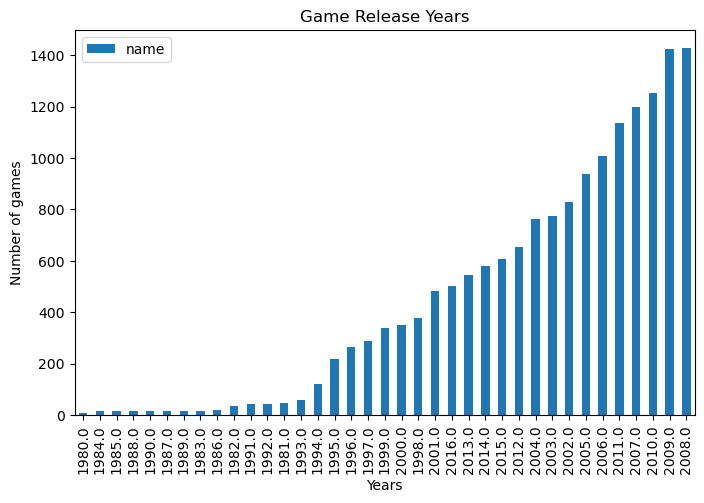

In [126]:
#group game titles by year
df_by_years = df.pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by='name', ascending=True)
#display(df_by_years)
#visualize the content
df_by_years.plot( y="name", kind="bar", figsize=(8,5))

plt.title('Game Release Years')
plt.ylabel('Number of games')
plt.xlabel('Years')
plt.show()

The graph shows that relatively few games were released between 1980 and 1995 and this data is not important.


In [127]:
df = df[df['year_of_release'] >= 1995]

df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80


Let's see how sales changed by platform. Let's select 10 platforms with the highest total sales and plot the distribution by year. Over what typical period do new platforms appear and old platforms disappear?

In [128]:
#list of 10 platforms with the highest sales
df_top10 = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales',ascending=False )
platforms_top10 = df_top10.head(10).index
platforms_top10

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'], dtype='object', name='platform')

In [129]:
# function that produces a pivot table for data since 1995
def sale_platform(name, data):
    return data[data['platform']==name].pivot_table(
        index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)

Let's build a distribution graph by year.

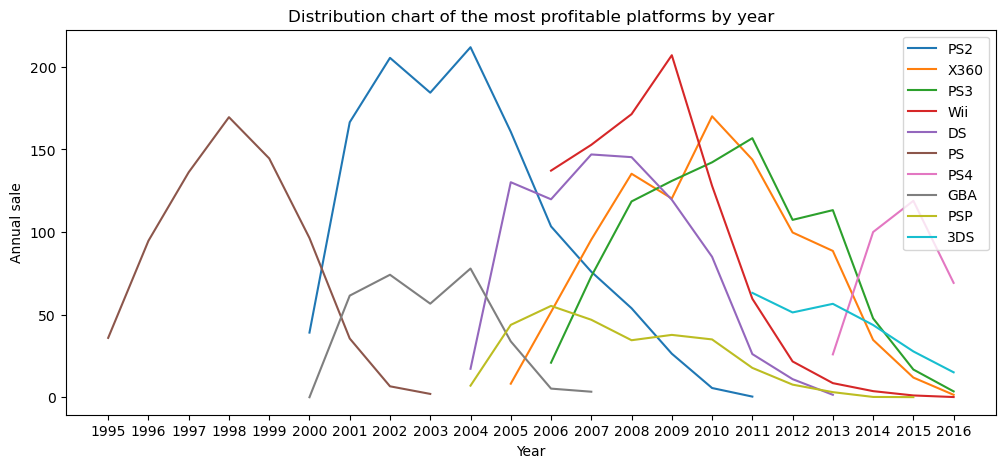

In [130]:
for i in platforms_top10:
   sale_platform(i,df)['total_sales'].plot(label=i, figsize=(12,5))

plt.xticks(np.arange(1995, 2017, step=1))    
plt.legend(loc='upper right')
plt.ylabel('Annual sale')
plt.xlabel('Year')

plt.title('Distribution chart of the most profitable platforms by year')
plt.show()

It can be seen that platforms appear and disappear within approximately 7-8 years.

The top selling platforms for the period from 2000 to 2016 are the platforms 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS, 'PS4', 'GBA', 'PSP', '3DS', ~'XB'~.

The PS2 peaked in 2004 and saw its profits decline until 2011. The Wii saw a sharp jump in 2009 and a sharp drop in sales.

The current period can be called the time from 2008 to 2016. Of the new platforms, the PS4 is the most successful - it has the highest sales over the past 3 years.

Let's display a boxplot of global game sales broken down by platform.

We will save data for the current period from **2013 to 2016** and the most profitable platforms in a new table

In [131]:

df_relevant = df[(df['platform'].isin(platforms_top10)) & (df['year_of_release'] >= 2013)]

df_relevant.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [132]:
df_relevant['user_score'].fillna(0)

16       8.2
23       8.1
31         0
33         0
42       8.3
        ... 
16674      0
16677      0
16682      0
16691      0
16710      0
Name: user_score, Length: 1323, dtype: object

Text(0, 0.5, 'Global Sales')

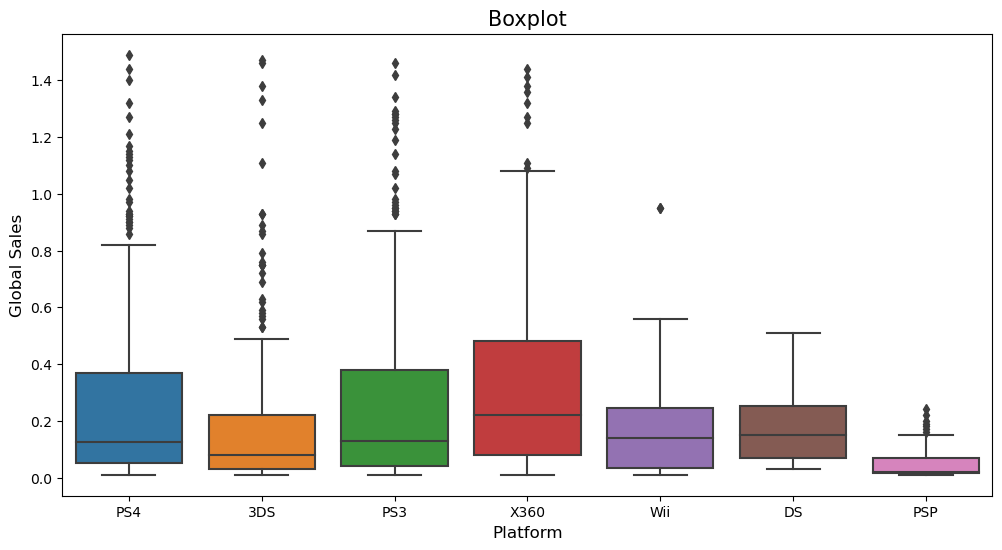

In [133]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_relevant.query('total_sales < 1.5'), x='platform', y='total_sales')
plt.title('Boxplot', fontsize=15)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Global Sales',fontsize=12)
#An upper limit on sales has been introduced here so that emissions do not have such an impact on the scale of the overall graph

From this we can see that the PS3, X360, and PS4 have the most sales for the **current** period. In general, the medians lie in different directions.

**Conclusion from boxplots:** Judging by the boxplots of the top 10 most profitable platforms, the most successful is the X360, and the PSP is in last place.
X360 stands out not only for its sales volume, but also for its highest median value, while the platform seems less attractive. The PS4, 3DS, PS3, X360 platforms have a large number of outliers in the upper whisker and an increased value of the upper quantile.

Let's take a closer look at the boxplot for the most popular games, for example X360.

count    186.000000
mean       0.735484
std        1.663275
min        0.010000
25%        0.080000
50%        0.265000
75%        0.795000
max       16.270000
Name: total_sales, dtype: float64

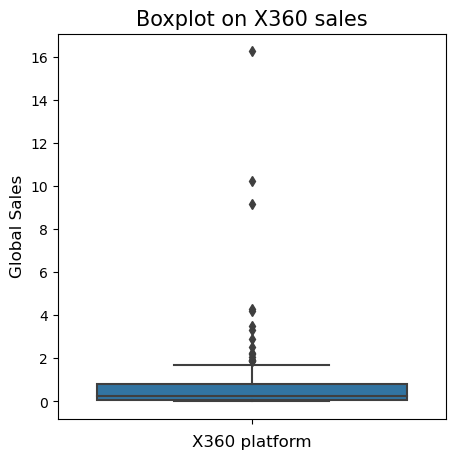

In [134]:
plt.figure(figsize=(5,5))
df_X360 = df_relevant.query('platform =="X360" ')
sns.boxplot(data=df_X360, y='total_sales')
plt.title('Boxplot on X360 sales', fontsize=15)
plt.xlabel('X360 platform', fontsize=12)
plt.ylabel('Global Sales',fontsize=12)
df_X360['total_sales'].describe()

It can be seen that there is a certain number of outliers, max=16.27, with an average mean=0.735. Let's correct, 'total_sales <3'.

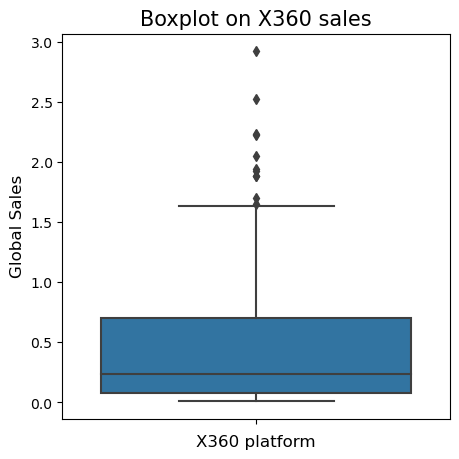

count    179.000000
mean       0.479385
std        0.571671
min        0.010000
25%        0.080000
50%        0.240000
75%        0.705000
max        2.920000
Name: total_sales, dtype: float64

In [135]:
df_X360 = df_X360.query('total_sales <3')


plt.figure(figsize=(5,5))
sns.boxplot(data=df_X360, y='total_sales')
plt.title('Boxplot on X360 sales', fontsize=15)
plt.xlabel('X360 platform', fontsize=12)
plt.ylabel('Global Sales',fontsize=12)
plt.show()
df_X360['total_sales'].describe()

Now the values ​​are more realistic, the average is 0.511, the maximum is 0.99, the median is in the area of ​​0.18. Let's look at the histogram of this value to see the distribution. As can be seen from the boxplot, there are some outliers, but in general the values ​​vary greatly, hence the relatively large standard deviation.

<Axes: >

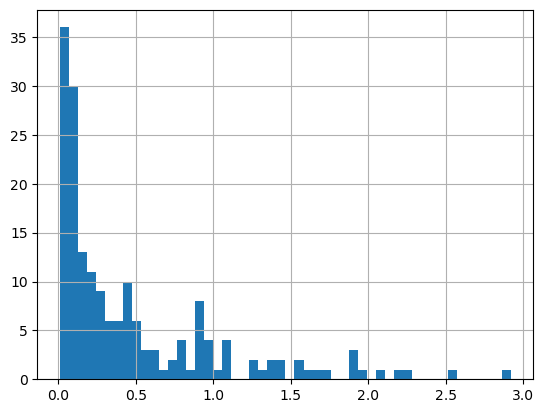

In [136]:
df_X360['total_sales'].hist(bins=50)

Let's see how reviews from users and critics affect sales within one popular platform. Let's build a scatterplot for the PS3 platform and calculate the correlation between reviews and sales. Previously, we did not remove the "unknown" ~~tbd~~ value and the gaps in the estimates, now we will process this to find a correlation and display a scatter plot.

In [137]:
def df_filter(column, value):
    df_filtered = df[(df[column] == value) & (df['user_score']!="unknown")].fillna(0) # remove unknown values
    df_filtered['user_score'] = df_filtered['user_score'].astype(float) # now let's change the data type, since there are only numbers left
    df_filtered = df_filtered.query('user_score > 0').fillna(0) # replace blanks with zero
    return df_filtered

In [138]:
df_filter('platform', "PS3")
df_filter('platform', "PS3")['user_score'].corr(df_filter('platform', "PS3")['total_sales']) 

0.12841562938563028

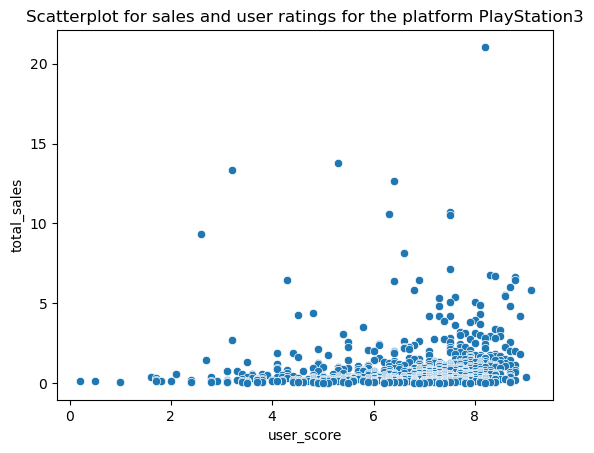

In [139]:
sns.scatterplot(data=df_filter('platform', "PS3"), x='user_score', y= 'total_sales')
plt.title('Scatterplot for sales and user ratings for the platform PlayStation3')
plt.show()

In [140]:
df_filter('platform', "PS3")['user_score'].describe()

count    861.000000
mean       6.719512
std        1.463300
min        0.200000
25%        6.000000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

Here we note that we removed the rating values ​​equal to zero, because We replaced the tbd values ​​with zero and the original evaluation values ​​with 0. Even if they showed high sales, this would most likely be an error in the data.
The resulting correlation value from user ratings to sales is 11.5%, and starting from rating 6, revenue increases. You can also see that this game has an average score of 6.7 with a standard deviation of 1.5.

Now let's do the same for critics' ratings:

In [141]:
df_filter('platform', "PS3")['critic_score'].corr(df_filter('platform', "PS3")['total_sales'])  # let's look at the correlation

0.3019174692623761

Text(0.5, 1.0, 'Scatterplot for sales and critic ratings for the platform PlayStation3')

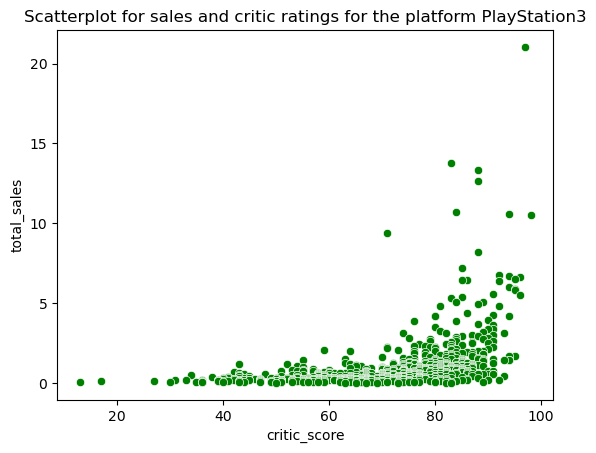

In [142]:
sns.scatterplot(data=df_filter('platform', "PS3").dropna().query('critic_score>0'), x='critic_score', y= 'total_sales', color="green")
plt.title('Scatterplot for sales and critic ratings for the platform PlayStation3')


In [143]:
df_filter('platform', "PS3")['critic_score'].describe()

count    861.000000
mean      63.824623
std       25.063234
min        0.000000
25%       57.000000
50%       71.000000
75%       81.000000
max       98.000000
Name: critic_score, dtype: float64

The resulting correlation value from user ratings to sales is about 30%.
You can also see that this game is rated at an average of ~63% with a standard deviation of 25. Revenue increases significantly from a rating of 80 - there are not many games that are particularly profitable and their rating is high.

Relate your findings to game sales on other platforms.

In [144]:
df_filter('platform', "X360")['user_score'].corr(df_filter('platform', "X360")['total_sales'])  

0.11418661214018047

In [145]:
df_filter('platform', "X360")['critic_score'].corr(df_filter('platform', "X360")['total_sales'])  

0.30094315730562504

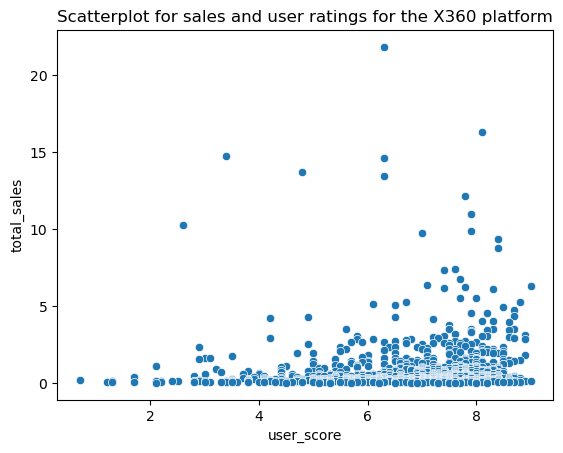

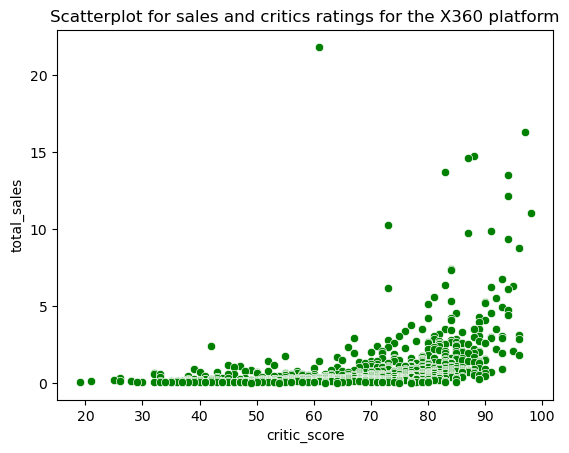

In [146]:
sns.scatterplot(data=df_filter('platform', "X360").dropna(), x='user_score', y= 'total_sales')
plt.title('Scatterplot for sales and user ratings for the X360 platform')
plt.show()
sns.scatterplot(data=df_filter('platform', "X360").dropna().query('critic_score>0'), x='critic_score', y= 'total_sales', color="green")
plt.title('Scatterplot for sales and critics ratings for the X360 platform')
plt.show()

For the X360 platform we observe similar “behavior”: The correlation between user ratings and sales is 10%, between critics’ ratings is 30%. Let's consider another platform:

In [147]:
df_filter('platform', "Wii")['user_score'].corr(df_filter('platform', "Wii")['total_sales'])

0.11283121360773782

In [148]:
df_filter('platform', "Wii")['critic_score'].corr(df_filter('platform', "Wii")['total_sales'])  

0.14211828436769364

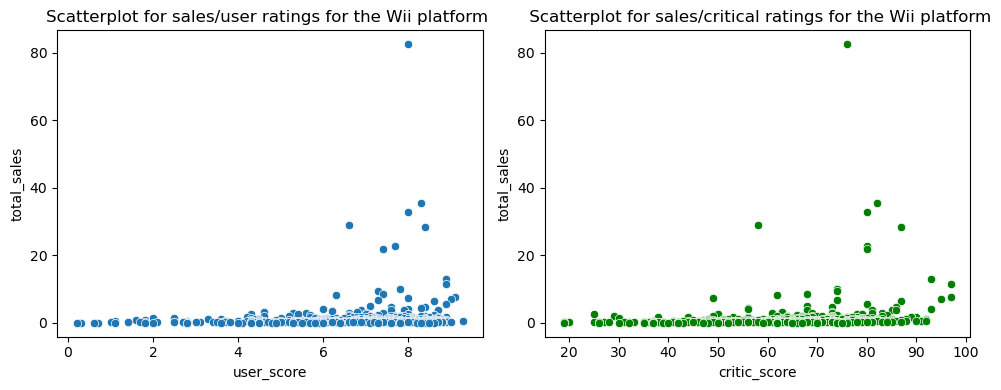

In [149]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# First scatterplot
sns.scatterplot(data=df_filter('platform', "Wii"), x='user_score', y='total_sales', ax=axes[0])
axes[0].set_title('Scatterplot for sales/user ratings for the Wii platform ')

# Second scatterplot
sns.scatterplot(data=df_filter('platform', "Wii").dropna().query('critic_score > 0'), x='critic_score', y='total_sales', color="green", ax=axes[1])
axes[1].set_title(' Scatterplot for sales/critical ratings for the Wii platform')

# Display the plots
plt.tight_layout()
plt.show()


For the Wii platform, the correlation of user ratings and sales is also quite low - 11%, but the correlation of critics' ratings is also lower - 14%.

One might assume that a high user rating does not mean high sales. Critics' correlations are higher, which means users are more likely to listen to their ratings.



Let's look at the general distribution of games by genre. What can you say about the most profitable genres? Are there genres with high and low sales?

In [150]:
df_genre = df_relevant.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales',ascending=False)
df_genre

,total_sales
genre,
Action,252.83
Shooter,155.89
Role-Playing,118.31
Sports,117.41
Misc,43.45
Fighting,25.48
Platform,24.89
Racing,21.67
Adventure,16.82


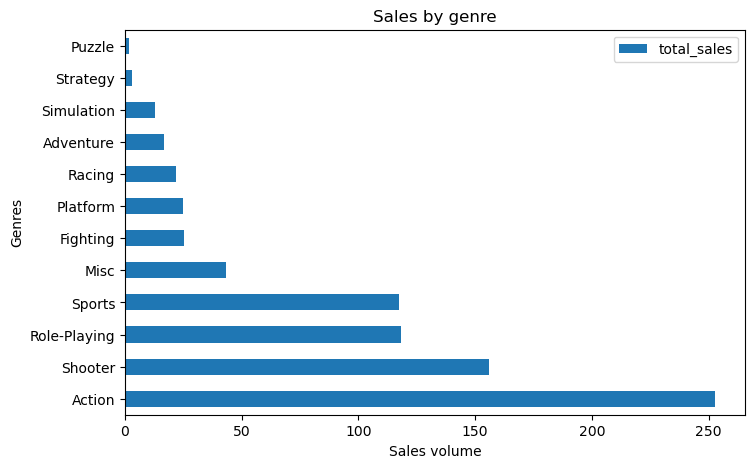

In [151]:
#visualize the content
df_genre.plot( y="total_sales", kind="barh", figsize=(8,5))

plt.title('Sales by genre')
plt.xlabel('Sales volume')
plt.ylabel('Genres')
plt.show()

The most profitable genre is Action by a wide margin, followed by Shooter, Role-Playing. The least profitable genres are Puzzle, Strategy.

Text(0, 0.5, 'Глобальные продажи')

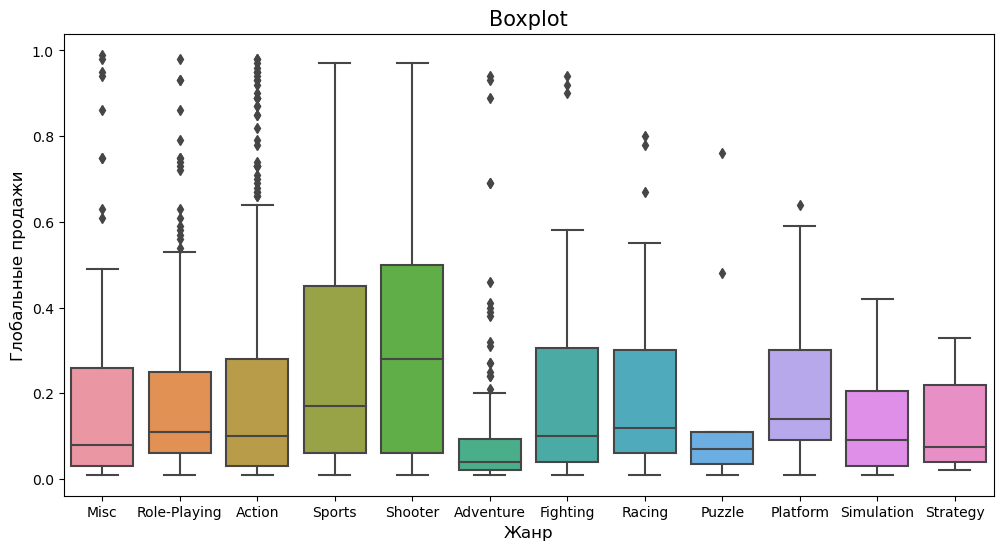

In [152]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_relevant.query('total_sales < 1'), x='genre', y='total_sales')
plt.title('Boxplot', fontsize=15)
plt.xlabel('Жанр', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
#An upper limit on sales was introduced here so that emissions would not have such an impact on the scale of the overall graph

As can be seen from the graph, the Sports and Shooter genres have the widest sales range; apparently, there are “hits” and not very popular games. Adventure and Puzzle have the lowest sales. The medians of the genres Action, Role-Playing, Racing, Fighting are shifted down and are approximately at the same sales value. The Shooter genre has the highest median value.

**Conclusion from step 3.**
The distribution of games by year was examined and it was revealed that most gaming platforms appear and disappear within 7-8 years. Games released before 2000 were not considered, since there were very few of them, and then data before 2008 was filtered out, because... platforms created before 2008 no longer have sales. Thus, we reduced the data to only the 10 most profitable platforms for the current period.

Next, we looked at how sales depend on ratings. The user rating correlates with sales as 10-13%, while the critic rating is 30%. It is also worth considering here that a large number of user rating values ​​were designated by “tbd”, which was replaced for analysis by 0, and the zeros were then omitted. Perhaps with this data the correlation would look different.

Among the genres, the most profitable are Shooter, Sports, Action, Fighting, Racing. The least profitable are Puzzle.




**Step 4.** User profile for each region

Define for each region user (NA, EU, JP):
 The most popular platforms (top 5). Describe the differences in sales shares.
 The most popular genres (top 5). Explain the difference.
 Does the ESRB rating affect sales in a particular region?

In [153]:
df_relevant

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16674,Tsukigime Ranko's Longest Day,PS3,2014.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16682,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


In [154]:
def define_genre(region_sales, data):
    return data.pivot_table(
        index='genre', values=region_sales, aggfunc='sum'
    ).sort_values(by=region_sales,ascending=False).head().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8), subplots=True)


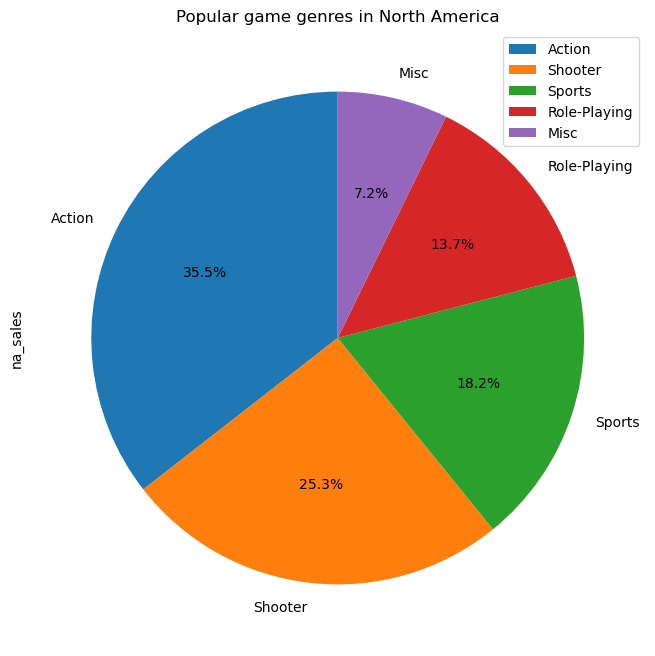

In [155]:
define_genre('na_sales',df_relevant)
plt.title('Popular game genres in North America')

plt.show()

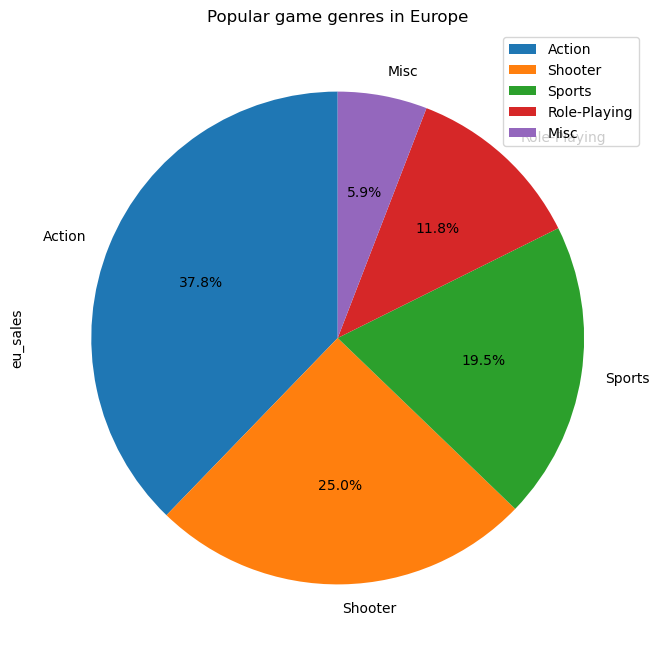

In [156]:
define_genre('eu_sales',df_relevant)
plt.title('Popular game genres in Europe')

plt.show()

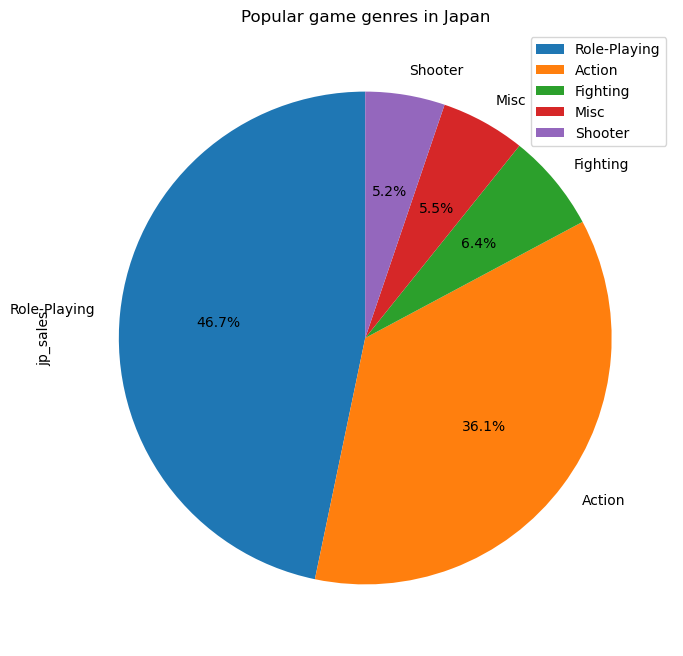

In [157]:
define_genre('jp_sales',df_relevant)
plt.title('Popular game genres in Japan')

plt.show()

In the North America region, sales leaders are: Action (391.85), Shooter (262.09)
Sports (257.65).

In Europe: Action (271.98), Shooter (171.11), Sports (168.24)

In Japan: Role-Playing (129.44), Action (82.18), Fighting (32.56)

In America and Europe, the sales shares and genres are approximately the same, but in Japan the preferences are different - Role-Playing will take 46.7% of sales, Action - 36.1%, and in third place is "Fighting" 6.4%.


Let's look at the most popular platforms (top 5).

In [158]:
def define_platform(region_sales, data):
    return data.pivot_table(
        index='platform', values=region_sales, aggfunc='sum'
    ).sort_values(by=region_sales, ascending=False
                 ).plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8), subplots=True)


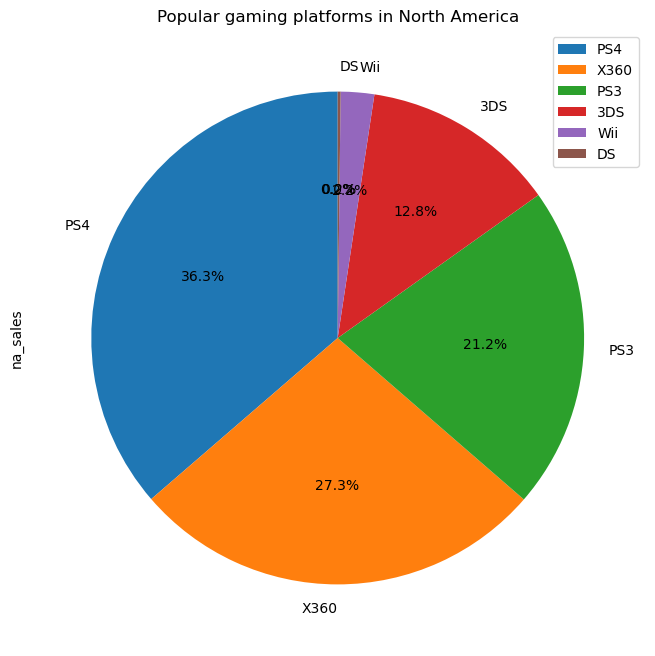

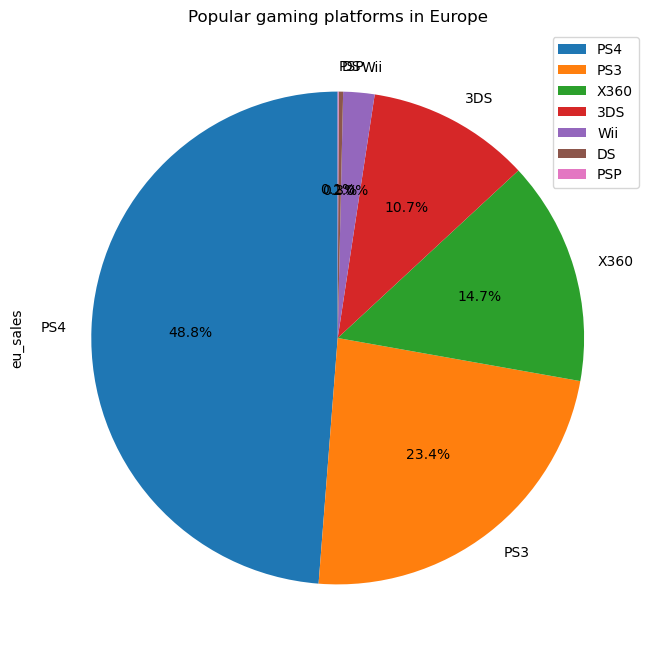

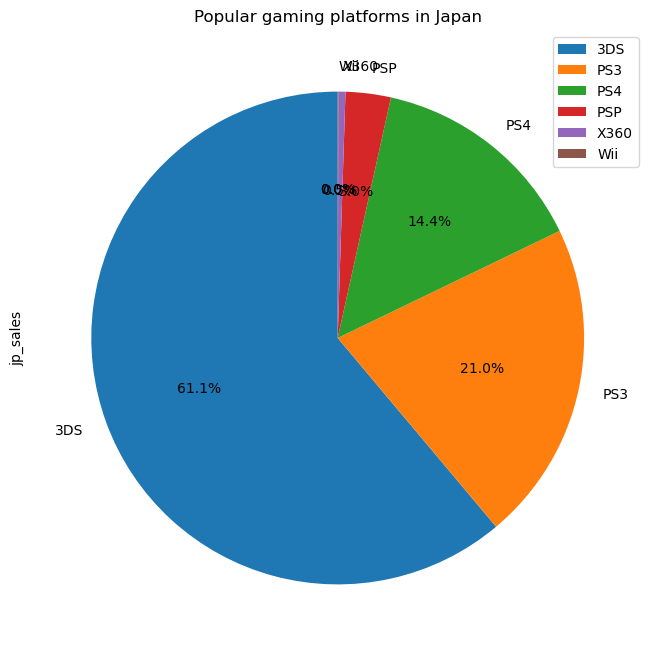

In [159]:
define_platform('na_sales', df_relevant)
plt.title('Popular gaming platforms in North America')

plt.show()

define_platform('eu_sales',df_relevant)
plt.title('Popular gaming platforms in Europe')

plt.show()
define_platform('jp_sales',df_relevant)
plt.title('Popular gaming platforms in Japan')

plt.show()

Among the platforms in America, PS4, X360, PS3 lead

In Europe PS4, PS3, X360.

In Japan 3DS, PS3, PS4.

The percentage proportions are visible on the graph.

Let's check whether the ESRB rating affects sales in a particular region?


In [160]:
def define_rating(region_sales, data):
    return data.pivot_table(
        index='rating', values=region_sales, aggfunc='sum'
    ).sort_values(by=region_sales, ascending=False
                 ).head().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8), subplots=True)


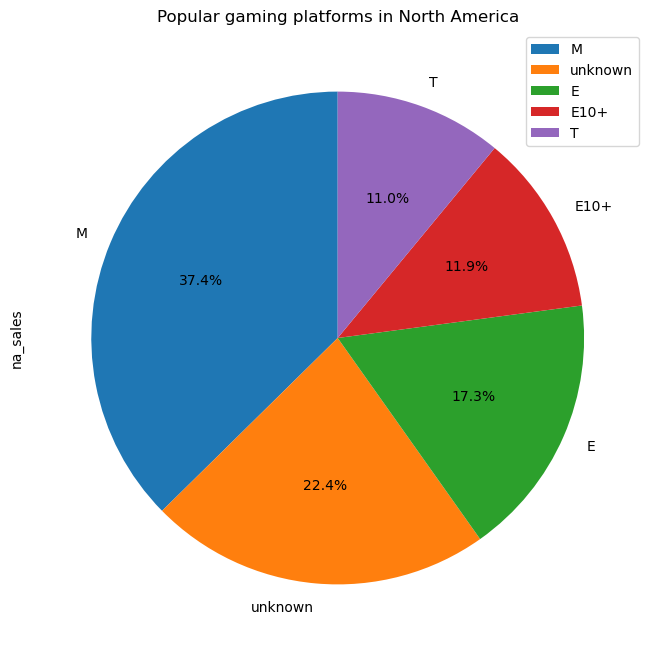

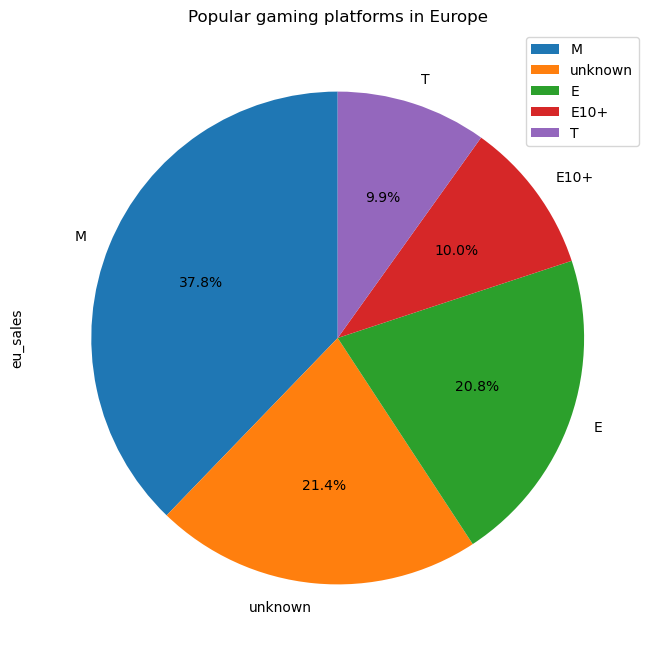

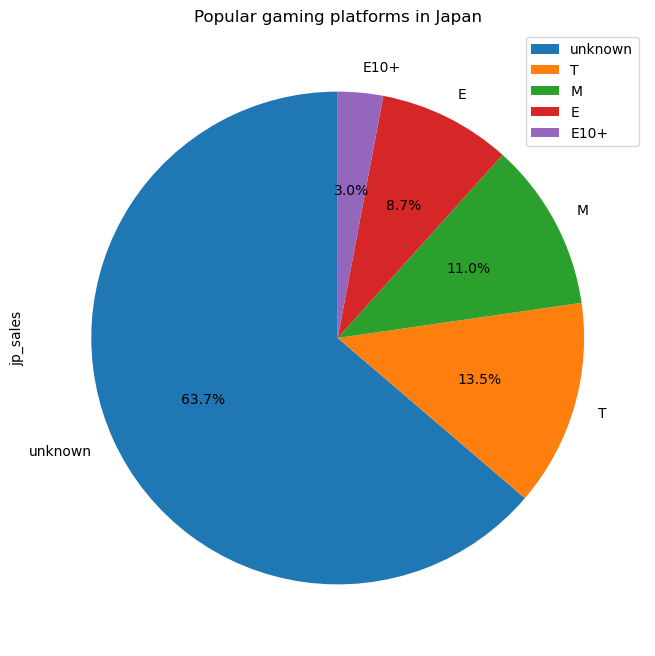

In [161]:
define_rating('na_sales', df_relevant)
plt.title('Popular gaming platforms in North America')
plt.show()


define_rating('eu_sales', df_relevant)
plt.title('Popular gaming platforms in Europe')
plt.show()

define_rating('jp_sales', df_relevant)
plt.title('Popular gaming platforms in Japan')
plt.show()

The ESRB rating breakdown is as follows:

- In America, 37.4% of sales are labeled as “M” (for adults), 22.4% “to be defined”, 17.3% “E” (for everyone)

- In Europe, 37.8% are marked "M", 21.4% "to be defined", 20.8% "E"

- In Japan 63.7% “to be defined”, 13.5% “T”, 11.0.7% “M”.


In general, there are similarities between the solutions: from 11 to 20% for adults, ~10% for adolescents.

**Conclusion from step 4**

It can be concluded that in North America the most popular genres are action, shooting and sports video games, just like in Europe. In Japan, role-playing games come first, followed by action films and games of various genres. By platform: Among the platforms in America, the leaders are PS4, X360, PS3. In Europe PS4, PS3, X360. In Japan 3DS, PS3, PS4.


In terms of age ratings for games, in all regions, a third of games are intended for adults, about 10-13% are for teenagers, and most in Japan do not yet have an age label.

**Step 5 Hypothesis testing**

**1. Test the hypothesis:** The average user ratings for the Xbox One and PC platforms are the same.

To test the hypothesis, you need to perform a two-sample t-test for independent samples. In the null hypothesis, you need to test whether the mean of one population is equal to the mean of another (μ 1 = μ 2). The alternative hypothesis states their inequality (μ 1 ≠ μ 2). Since there is no need to check whether the mean of the first population is greater or less, the test is two-sided. Let's take the alpha value as 0.01.

Null hypothesis H0: The average user ratings for the Xbox One and PC platforms are the same;
Alternative Hypothesis: Average user ratings for the Xbox One and PC platforms are  different.

First, let's create the necessary samples.

In [162]:
df_filter('platform', "XOne").query('year_of_release >= 2012').head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014.0,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015.0,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015.0,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
373,Assassin's Creed: Unity,XOne,2014.0,Action,2.27,0.90,0.00,0.33,72.0,4.1,M,3.50


In [163]:
df_filter('platform', "PC").query('year_of_release >= 2012').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
192,Diablo III,PC,2012.0,Role-Playing,2.44,2.16,0.0,0.54,88.0,4.0,M,5.14
458,The Sims 4,PC,2014.0,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
688,Guild Wars 2,PC,2012.0,Action,0.96,1.07,0.0,0.27,90.0,7.9,T,2.30
959,World of Warcraft: Mists of Pandaria,PC,2012.0,Role-Playing,0.84,0.76,0.0,0.22,82.0,4.8,T,1.82
1095,StarCraft II: Heart of the Swarm,PC,2013.0,Strategy,0.83,0.66,0.0,0.18,86.0,7.9,T,1.67


Let's proceed to the t-test:

In [164]:
alpha = 0.01

results = st.ttest_ind( df_filter('platform', "XOne").query('year_of_release >= 2012')['user_score'],  df_filter('platform', "PC").query('year_of_release >= 2012')['user_score'])


print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Failed to reject the null hypothesis')
    

p-value: 0.5535080500643661
Failed to reject the null hypothesis


Let's calculate the exact values:

In [165]:
df_filter('platform', "XOne").query('year_of_release >= 2012')['user_score'].mean(), df_filter('platform', "PC").query('year_of_release >= 2012')['user_score'].mean()


(6.521428571428572, 6.4286407766990274)

**Conclusion:** The P-value is 0.55, which means there is a 55% chance that the platforms have the same average user rating. Calculating the average shows that the values ​​are very close.



**2. Test the hypothesis:** Average user ratings for the Action and Sports genres are different.

It is necessary to conduct a t-test on the equality of the means of two independent populations.

Null hypothesis H0: The average user ratings for the Action and Sports genres are the same.

Alternative hypothesis H0: The average user ratings for the Action and Sports genres are different.

In [166]:
df_filter('genre', "Action").query('year_of_release >= 2012').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
81,FIFA Soccer 13,PS3,2012.0,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
127,Assassin's Creed III,PS3,2012.0,Action,2.64,2.52,0.16,1.12,85.0,6.9,M,6.44


In [167]:
df_filter('genre', "Sports").query('year_of_release >= 2012').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
126,FIFA 14,PS3,2013.0,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
143,FIFA 15,PS4,2014.0,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
264,FIFA 15,PS3,2014.0,Sports,0.58,3.02,0.04,0.64,0.0,4.5,E,4.28


In [168]:
alpha = 0.05

results = st.ttest_ind( df_filter('genre', "Action").query('year_of_release >= 2012')['user_score'], df_filter('genre', "Sports").query('year_of_release >=2012')['user_score'])


print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Reject the null hypothesis')
else:
    print('Failed to reject the null hypothesis')
  

p-value: 3.7163089460934874e-26
Reject the null hypothesis


In [169]:
display(df_filter('genre', "Action").query('year_of_release >= 2012')['user_score'].mean()) 
df_filter('genre', "Sports").query('year_of_release >= 2012')['user_score'].mean()

6.825047801147227

5.455897435897437

**Conclusion.** Average user ratings for the action and sports genres for the current period are not equal.

# Conclusion:

Gaming platforms were analyzed. The source data contains information on 9,701 games and 20 different platforms from 1980 to 2016, providing year of publication, genre, sales by region, user and critic ratings, and age rating. During data preprocessing, the column names were converted to lower case, in the column with the year of issue the data was converted to numeric format, and duplicates were checked. The omissions, of which there were a small number, were removed. About 40% of gaps were found in the ratings columns; they were left replaced with a placeholder for the age rating, since if they were removed, information about genres, sales, etc. would be lost. Global sales have been calculated in the 'total_sales' column.

The study revealed that games before 2000 can be neglected due to the small number, and the platforms that emerged around 2000 had already disappeared by 2008, so the current period was taken as 2013-2016. The top selling platforms for the period from 1995 to 2016 are the platforms PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'.
The PS2 peaked in 2004 and saw its profits decline until 2011. The Wii saw a sharp jump in 2009 and a sharp drop in sales. Of the new platforms, the PS4 is the most successful - it has the highest sales over the past 3 years.

The distribution of platforms and genres by region is also considered. It can be concluded that in North America the most popular genres are action, shooting and sports video games, just like in Europe. In Japan, role-playing games come first, followed by action films and games of various genres. By platform: in North America, PS4, X360, PS are the leaders in profitability. In Europe PS3, PS3, X360. In Japan 3DS, PS3 and PS4.
As for the age rating of games, in all regions a third of games are intended for adults, about 10-13% for teenagers.
The correlation of sales with user ratings is approximately 10%, with critics' ratings - 30%.

Two hypotheses have been tested, the first is about the equality of average user ratings for the Xbox One and PC platforms - it has been proven that they are not equal.
Testing the hypothesis about the average user ratings of the genres Action (English “action”, action games) and Sports (English “sports competitions”) are different showed that these ratings are not equal.

Recommendation for business is to purchase games of the Shooter, Action, Sports genres in North America and Europe, in Japan - Roleplay and Action. Since sales correlate better with critic ratings, steps can be taken to increase critical reviews. Keep in mind that peak sales occur 3-5 years after the launch of the platform.

